<a href="https://colab.research.google.com/github/fedhere/DSPS/blob/master/lab3_PI_fbb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import pylab as pl
#!pip install astropy
import astropy
from astropy import units as u


%pylab inline


Populating the interactive namespace from numpy and matplotlib


In [0]:
def square(l, ax):
  ax.plot([-l, l], [-l, -l], 'k-')
  ax.plot([-l, l], [l, l], 'k-')
  ax.plot([-l, -l], [-l, l], 'k-')
  ax.plot([l, l], [-l, l], 'k-')
  

In [0]:
def circle(l, ax):
  theta = np.linspace(0, 360, 100)
  theta *= u.degree
  x = l * np.cos(theta.to(u.rad))
  y = l * np.sin(theta.to(u.rad))
  ax.plot(x, y, 'k-')
  

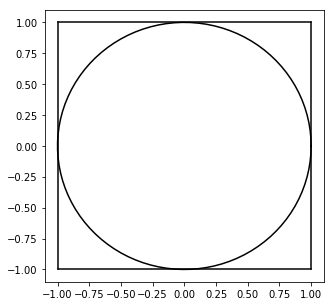

In [11]:
fig, ax = pl.subplots(figsize=(5, 5))
square(1, ax=ax)
circle(1, ax=ax)

In [0]:
def isin(x, y, l):
  return np.sqrt(x**2 + y**2) < l 

Pi: 3.20


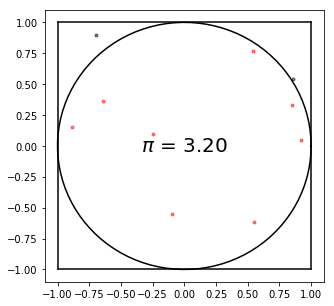

Pi: 3.52


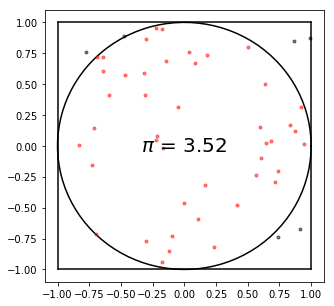

Pi: 3.20


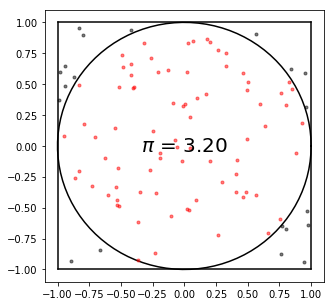

Pi: 3.17


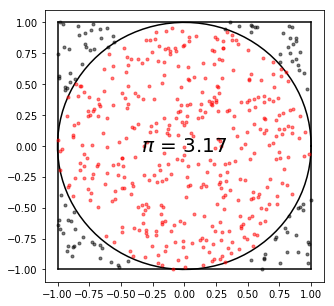

Pi: 3.10


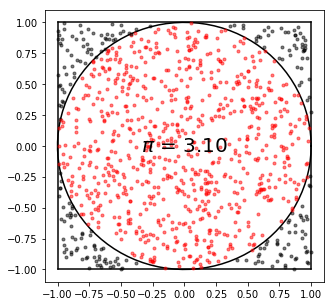

Pi: 3.14


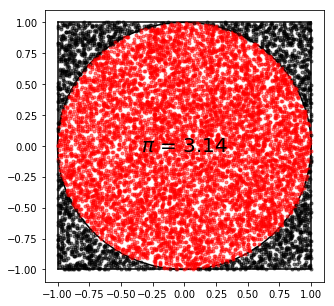

In [15]:
np.random.randn(123)
pis = {}
for N in [10, 50, 100, 500, 1000, 10000]:
  fig, ax = pl.subplots(figsize=(5, 5))
  square(1, ax=ax)
  circle(1, ax=ax)
  inner = 0

  for i in range(N):
    x = np.random.rand() * 2 - 1
    y = np.random.rand() * 2 - 1
    if isin(x, y, 1):
      inner += 1
      color = 'r'
    else: 
      color = 'k'
    ax.plot(x, y, '.', c=color, alpha=0.5)
  pl.text(0, 0, r"$\pi$ = {:.2f}".format(4 * inner / N), 
          fontsize=20, va="center", ha="center")
  pis[N] = 4 * inner / N
  print("Pi: {:.2f}".format(pis[N]))
  pl.show()

Text(9000, 3.141592653589793, '$\\pi$')

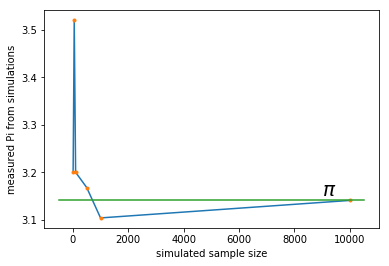

In [27]:
pl.plot(pis.keys(), pis.values())
pl.plot(pis.keys(), pis.values(), '.')
pl.xlabel("simulated sample size")
pl.ylabel("measured Pi from simulations")
pl.plot(pl.xlim(), [np.pi] * 2)



pl.text(9000, np.pi, r"$\pi$", va="bottom", fontsize=20)
